## About Dataset

### Description
This dataset focuses on understanding the patterns and effects of smartphone usage among teenagers, with a special focus on:
- **Addiction levels**
- **Academic performance**
- **Time distribution** (social media, gaming, education)
- **Mental and physical health proxies**

It enables researchers, educators, psychologists, and data scientists to:
- Explore and model behavioral trends.
- Build classification or regression models to predict addiction levels, performance, or placement outcomes.

---

### Column Description

| Column Name             | Description                                                                                     |
|-------------------------|-------------------------------------------------------------------------------------------------|
| Age                     | Age of the participant (in years)                                                               |
| Gender                  | Gender identity of the participant                                                              |
| Time_on_Social_Media    | Average daily time spent on social media (in hours)                                            |
| Time_on_Education       | Daily study/learning time (in hours)                                                            |
| Time_on_Gaming          | Daily gaming time (in hours)                                                                    |
| Phone_Checks_Per_Day    | How many times the participant checks their phone per day                                       |
| Phone_Usage_Purpose     | Primary purpose of phone usage (e.g., social, gaming, education, etc.)                         |
| Exercise_Hours          | Number of hours of physical activity per week                                                  |
| Academic_Performance    | Academic score or GPA                                                                           |
| IQ                      | Self-reported or estimated intelligence score                                                   |
| CG                      | Cumulative Grade (or general performance metric)                                                |
| Internship_Experience   | Binary or categorical indication of internship experience                                       |
| Projects_Completed      | Number of self-initiated or academic projects completed                                         |
| Placement               | Placement status (selected/not selected)                                                        |
| Addiction_Level         | Numeric measure of phone/screen addiction severity (to be binned for ML)                        |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv('../data/raw/teen_phone_addiction_dataset.csv', index_col='ID')

df.head(5)

,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
ID,,,,,,,,,,,,,,,,,,,,,
1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,0.1,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,0.0,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,0.8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,1.6,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,1.1,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [3]:
target    = 'Addiction_Level'
cat_cols  = ['Name', 'Gender', 'Location', 'School_Grade',
       'Phone_Usage_Purpose']
num_cols  = ['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Family_Communication', 'Weekend_Usage_Hours']

## EDA

In [4]:
df.describe()

,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


In [5]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 1 to 3000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    3000 non-null   object 
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Location                3000 non-null   object 
 4   School_Grade            3000 non-null   object 
 5   Daily_Usage_Hours       3000 non-null   float64
 6   Sleep_Hours             3000 non-null   float64
 7   Academic_Performance    3000 non-null   int64  
 8   Social_Interactions     3000 non-null   int64  
 9   Exercise_Hours          3000 non-null   float64
 10  Anxiety_Level           3000 non-null   int64  
 11  Depression_Level        3000 non-null   int64  
 12  Self_Esteem             3000 non-null   int64  
 13  Parental_Control        3000 non-null   int64  
 14  Screen_Time_Before_Bed  3000 non-null   float

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Daily_Usage_Hours'}>,
        <Axes: title={'center': 'Sleep_Hours'}>,
        <Axes: title={'center': 'Academic_Performance'}>],
       [<Axes: title={'center': 'Social_Interactions'}>,
        <Axes: title={'center': 'Exercise_Hours'}>,
        <Axes: title={'center': 'Anxiety_Level'}>,
        <Axes: title={'center': 'Depression_Level'}>],
       [<Axes: title={'center': 'Self_Esteem'}>,
        <Axes: title={'center': 'Parental_Control'}>,
        <Axes: title={'center': 'Screen_Time_Before_Bed'}>,
        <Axes: title={'center': 'Phone_Checks_Per_Day'}>],
       [<Axes: title={'center': 'Apps_Used_Daily'}>,
        <Axes: title={'center': 'Time_on_Social_Media'}>,
        <Axes: title={'center': 'Time_on_Gaming'}>,
        <Axes: title={'center': 'Time_on_Education'}>],
       [<Axes: title={'center': 'Family_Communication'}>,
        <Axes: title={'center': 'Weekend_Usage_Hours'}>,
        <Axes: title={'ce

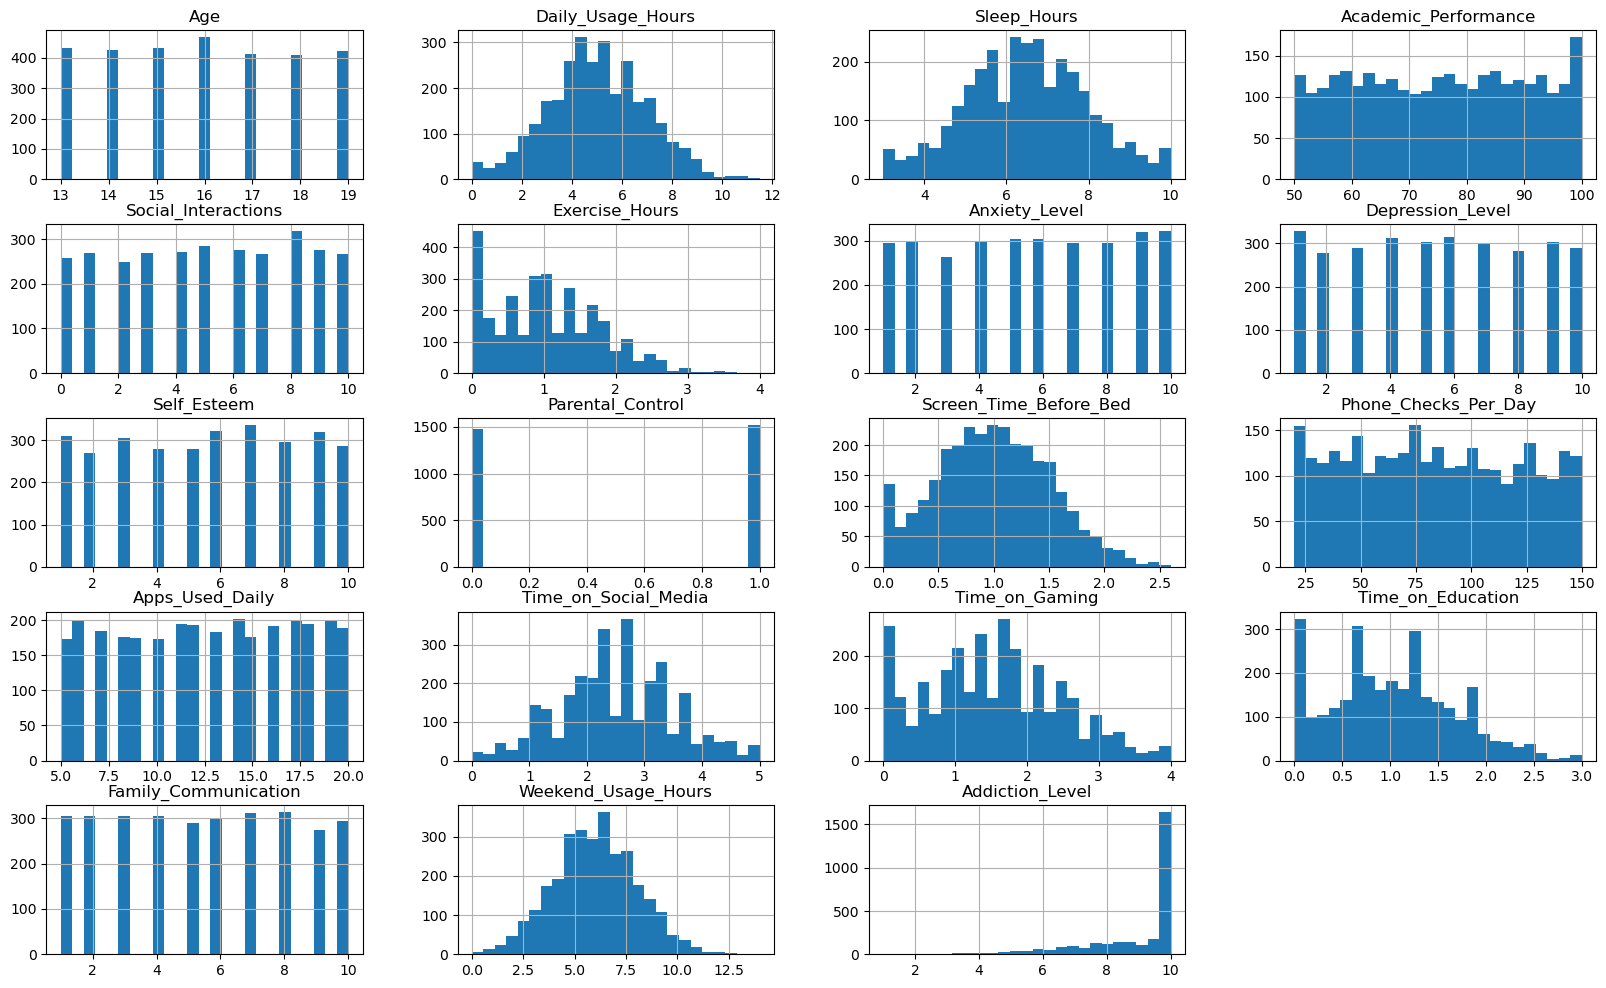

In [6]:
df.hist(grid=True, bins=25, figsize=(20,12))

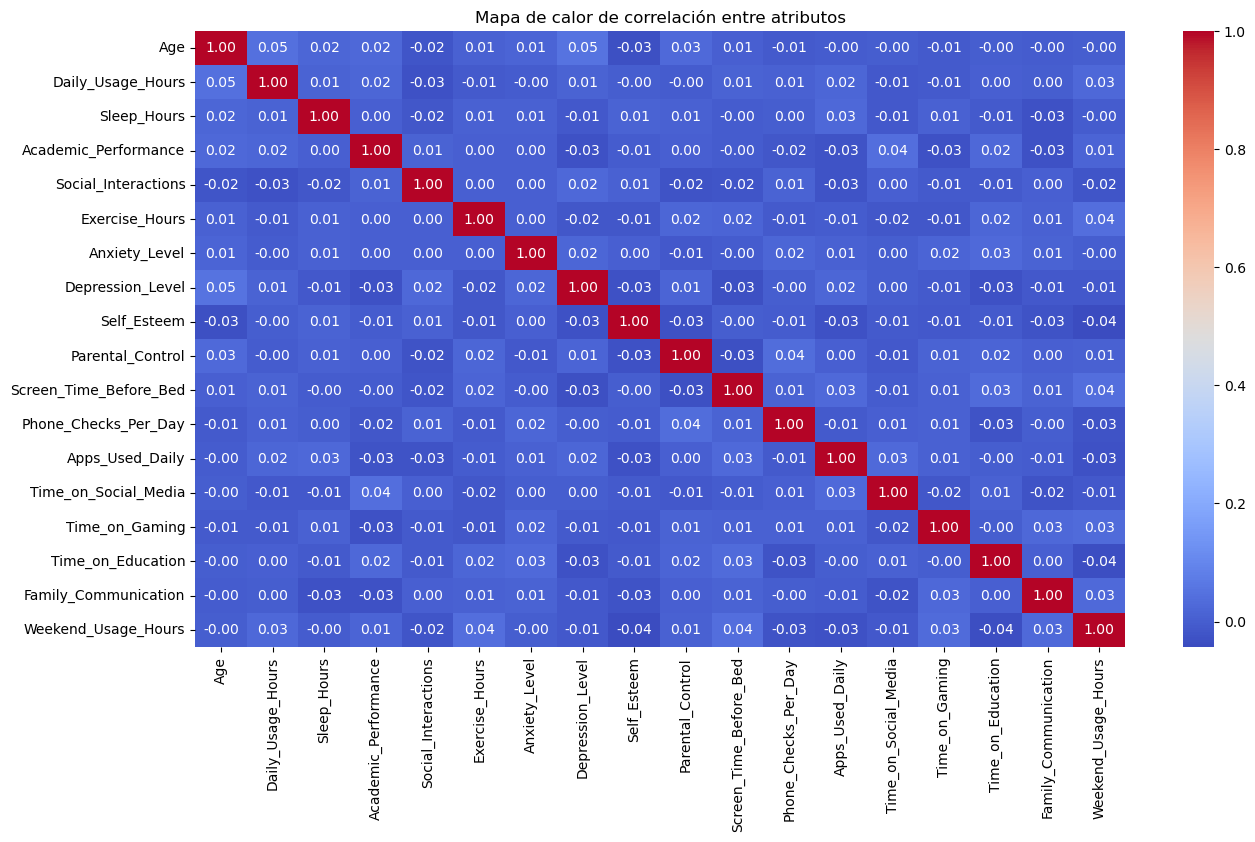

In [7]:
corr_matrix = df[num_cols].corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de calor de correlación entre atributos')
plt.savefig('../figures/mapaCalorCorrelacion.png')
plt.show()

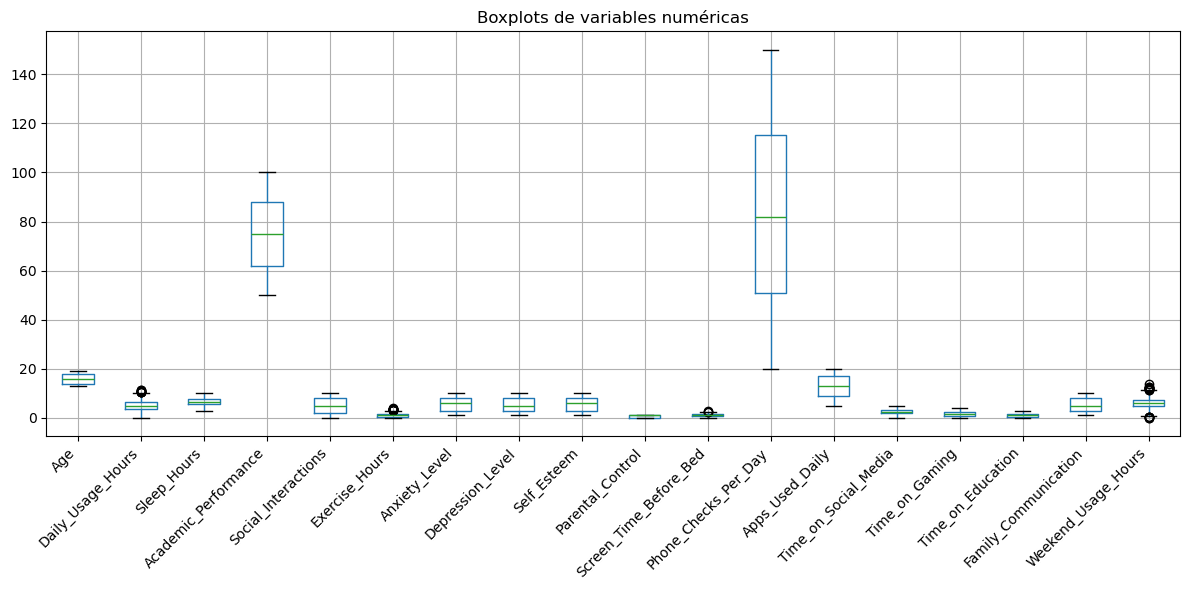

In [8]:
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots de variables numéricas')
plt.tight_layout()
plt.savefig('../figures/boxplot-valnum.png')
plt.show()

## Model

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [10]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),    num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [11]:
pipeline = Pipeline([
    ('preproc', preprocessor),
    ('model',    RandomForestRegressor(n_estimators=100, random_state=42))
])

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Daily_Usage_Hours',
                                                   'Sleep_Hours',
                                                   'Academic_Performance',
                                                   'Social_Interactions',
                                                   'Exercise_Hours',
                                                   'Anxiety_Level',
                                                   'Depression_Level',
                                                   'Self_Esteem',
                                                   'Parental_Control',
                                                   'Screen_Time_Before_Bed',
                                                   'Phone_Checks_Per_Day',
                                                   'Apps_Used_Daily',
                                                   'Time_on_Social_Media',
                                                   'Time_on_Gaming',
                                                   'Time_on_Education',
                                                   'Family_Communication',
                                                   'Weekend_Usage_Hours']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Name', 'Gender', 'Location',
                                                   'School_Grade',
                                                   'Phone_Usage_Purpose'])])),
                ('model', RandomForestRegressor(random_state=42))])

## Validation

In [14]:
y_pred = pipeline.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"MSE:  {mse:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"R2:   {r2:.3f}")

MSE:  0.348
MAE:  0.375
R2:   0.862


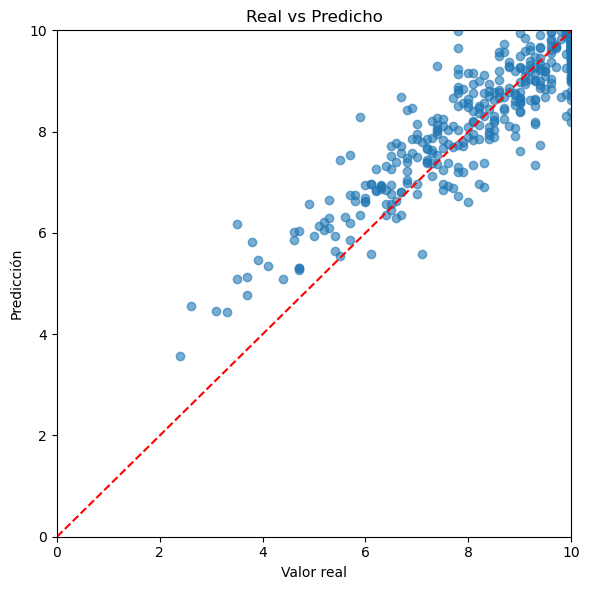

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0,10], [0,10], 'r--')
plt.xlim(0,10); plt.ylim(0,10)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Real vs Predicho')
plt.tight_layout()
plt.savefig('../figures/realVSpred.png')
plt.show()

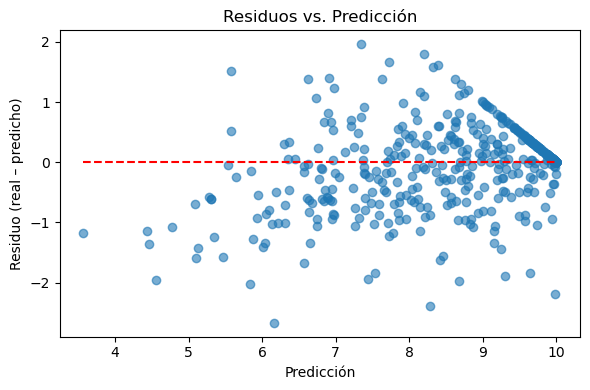

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
plt.xlabel('Predicción')
plt.ylabel('Residuo (real – predicho)')
plt.title('Residuos vs. Predicción')
plt.tight_layout()
plt.savefig('../figures/resVSpred.png')
plt.show()

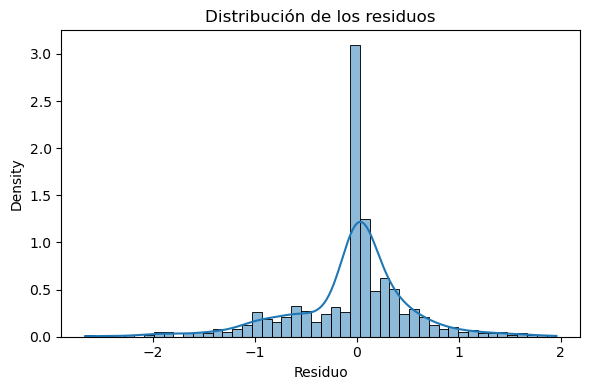

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, stat='density')
plt.xlabel('Residuo')
plt.title('Distribución de los residuos')
plt.tight_layout()
plt.savefig('../figures/distRes.png')
plt.show()

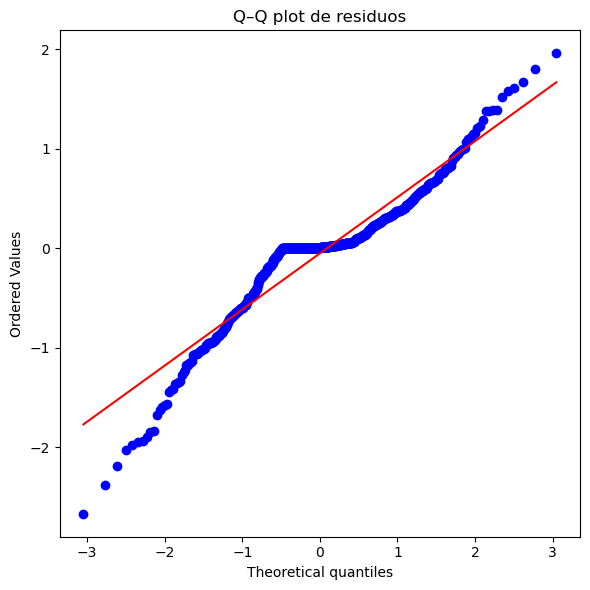

In [19]:
import scipy.stats as st

plt.figure(figsize=(6,6))
st.probplot(residuals, dist="norm", plot=plt)
plt.title('Q–Q plot de residuos')
plt.tight_layout()
plt.savefig('../figures/q-plot-res.png')
plt.show()

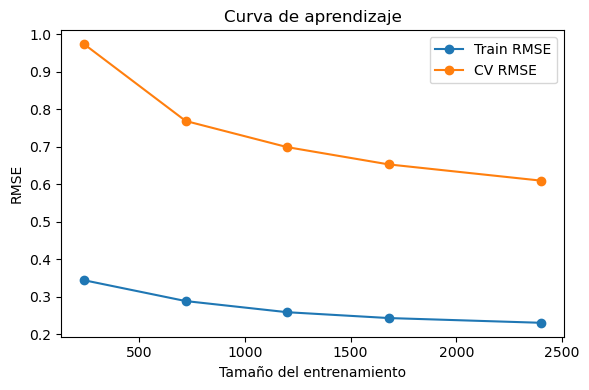

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    pipeline, X, y,
    cv=5,
    train_sizes=[0.1,0.3,0.5,0.7,1.0],
    scoring='neg_mean_squared_error'
)
train_rmse = (-train_scores)**0.5
valid_rmse = (-valid_scores)**0.5

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label='Train RMSE')
plt.plot(train_sizes, valid_rmse.mean(axis=1), 'o-', label='CV RMSE')
plt.xlabel('Tamaño del entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de aprendizaje')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/curve_learn.png')
plt.show()

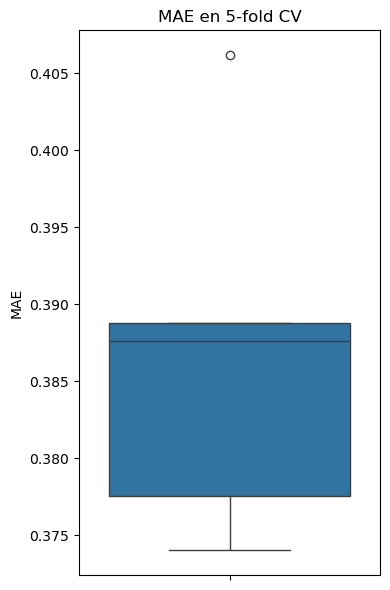

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y,
                         cv=5,
                         scoring='neg_mean_absolute_error')
mae_scores = -scores

plt.figure(figsize=(4,6))
sns.boxplot(y=mae_scores)
plt.ylabel('MAE')
plt.title('MAE en 5‐fold CV')
plt.tight_layout()
plt.savefig('../figures/MAE_Score.png')
plt.show()

num__Daily_Usage_Hours       0.419357
num__Apps_Used_Daily         0.118675
num__Time_on_Social_Media    0.109202
num__Time_on_Gaming          0.106832
num__Phone_Checks_Per_Day    0.084698
num__Sleep_Hours             0.057513
num__Weekend_Usage_Hours     0.006907
num__Academic_Performance    0.006428
num__Exercise_Hours          0.006310
num__Time_on_Education       0.005728
dtype: float64


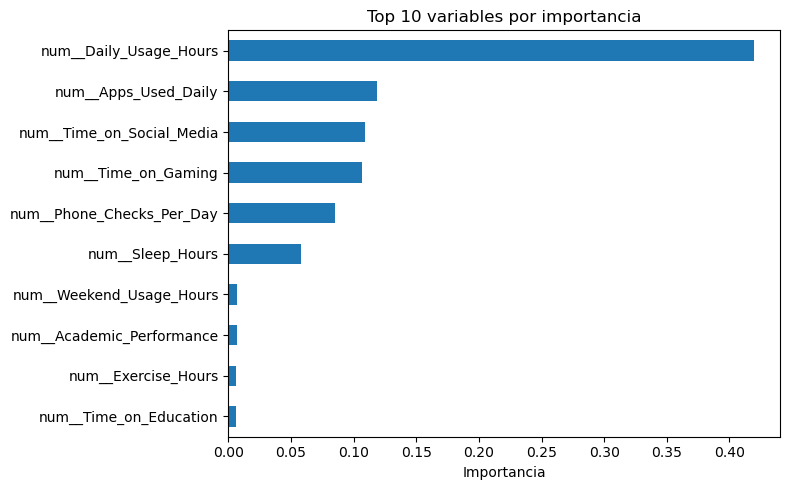

In [22]:
from sklearn.inspection import permutation_importance

preproc = pipeline.named_steps['preproc']
feature_names = preproc.get_feature_names_out()

model = pipeline.named_steps['model']
importances = model.feature_importances_

feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False)

print(feat_imp.head(10))

# 5) Gráfico de barras
plt.figure(figsize=(8,5))
feat_imp.head(10).plot.barh()
plt.gca().invert_yaxis()
plt.title('Top 10 variables por importancia')
plt.xlabel('Importancia')
plt.tight_layout()
plt.savefig('../figures/top8Features.png')
plt.show()

In [23]:
import joblib

joblib.dump(pipeline, '../models/addiction_pipeline.pkl')

['../models/addiction_pipeline.pkl']